# My Libraries

In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from colorama import Fore   

# Remove Warning

In [201]:
import warnings
warnings.simplefilter("ignore")

# My Dataset

In [310]:
df = pd.read_csv('Movies-Dataset.csv' , lineterminator='\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [203]:
df.shape

(9827, 9)

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [205]:
df.isna().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [206]:
df.duplicated().any()

False

# Ok After I used these functions I noticed many things :
>- Number of Rows is :  9827 
>
>                                                                                     
>- Number of columns is :  9
>
>
>- There are no null values
>
>
>- There is "0" complete duplicate
>
>
>- Overview and Poster-Url wouldn't be so useful during analysis

# EDA Questions
>- What is the most frequent genre in the dataset ?
>
>
>- What genres has highest votes ?
>
>
>- What movie got the highest popularity ?
>
>
>- Which year has the most number of movies ?

#  `Frist question`

#### most frequent genre in the dataset 

In [207]:
frequent_genre = df['Genre'].value_counts()
frequent_genre

Drama                                            466
Comedy                                           403
Drama, Romance                                   248
Horror                                           238
Horror, Thriller                                 199
                                                ... 
Drama, Horror, Thriller, Science Fiction           1
Action, Science Fiction, Animation, Adventure      1
Comedy, Fantasy, Horror, Science Fiction           1
Drama, Science Fiction, Animation                  1
War, Drama, Science Fiction                        1
Name: Genre, Length: 2337, dtype: int64

In [208]:
frequent_genre.unique()

array([466, 403, 248, 238, 199, 196, 139, 137, 125, 107, 105,  99,  94,
        87,  78,  74,  69,  68,  65,  61,  57,  56,  54,  50,  45,  43,
        42,  41,  40,  39,  34,  33,  32,  31,  30,  29,  28,  26,  25,
        24,  23,  22,  21,  20,  19,  18,  17,  16,  15,  14,  13,  12,
        11,  10,   9,   8,   7,   6,   5,   4,   3,   2,   1], dtype=int64)

<div class= "alert alert-block alert-info">
    <b> notice : in this cell we can consider that the number 100 and any number greater than it in the values of the function ( value_counts ) >> These are the appropriate numbers to have their own Index are the most famous movies genre.</b>
</div>

In [209]:
most_famous_movies_genre = frequent_genre >= 100
most_famous_movies_genre =most_famous_movies_genre[most_famous_movies_genre==True].index
print(Fore.BLUE + 'These are a most famous movies genre from high to low :')
most_famous_movies_genre

These are a most famous movies genre from high to low :


Index(['Drama', 'Comedy', 'Drama, Romance', 'Horror', 'Horror, Thriller',
       'Comedy, Romance', 'Documentary', 'Comedy, Drama', 'Action, Thriller',
       'Comedy, Drama, Romance', 'Thriller'],
      dtype='object')

##  visualization by ( countplot )

In [210]:
             #######  make a series belonging to the ( most_famous_movies_genre )   ########
 
a = []
for i in df['Genre'].values :
    if i in most_famous_movies_genre :
        a.append(i)
most_famous_movies_genre_series = pd.Series(a) 

                             #######   check   #######

assert len(most_famous_movies_genre_series.unique()) == len(most_famous_movies_genre)
assert most_famous_movies_genre_series.value_counts().min() >= 100

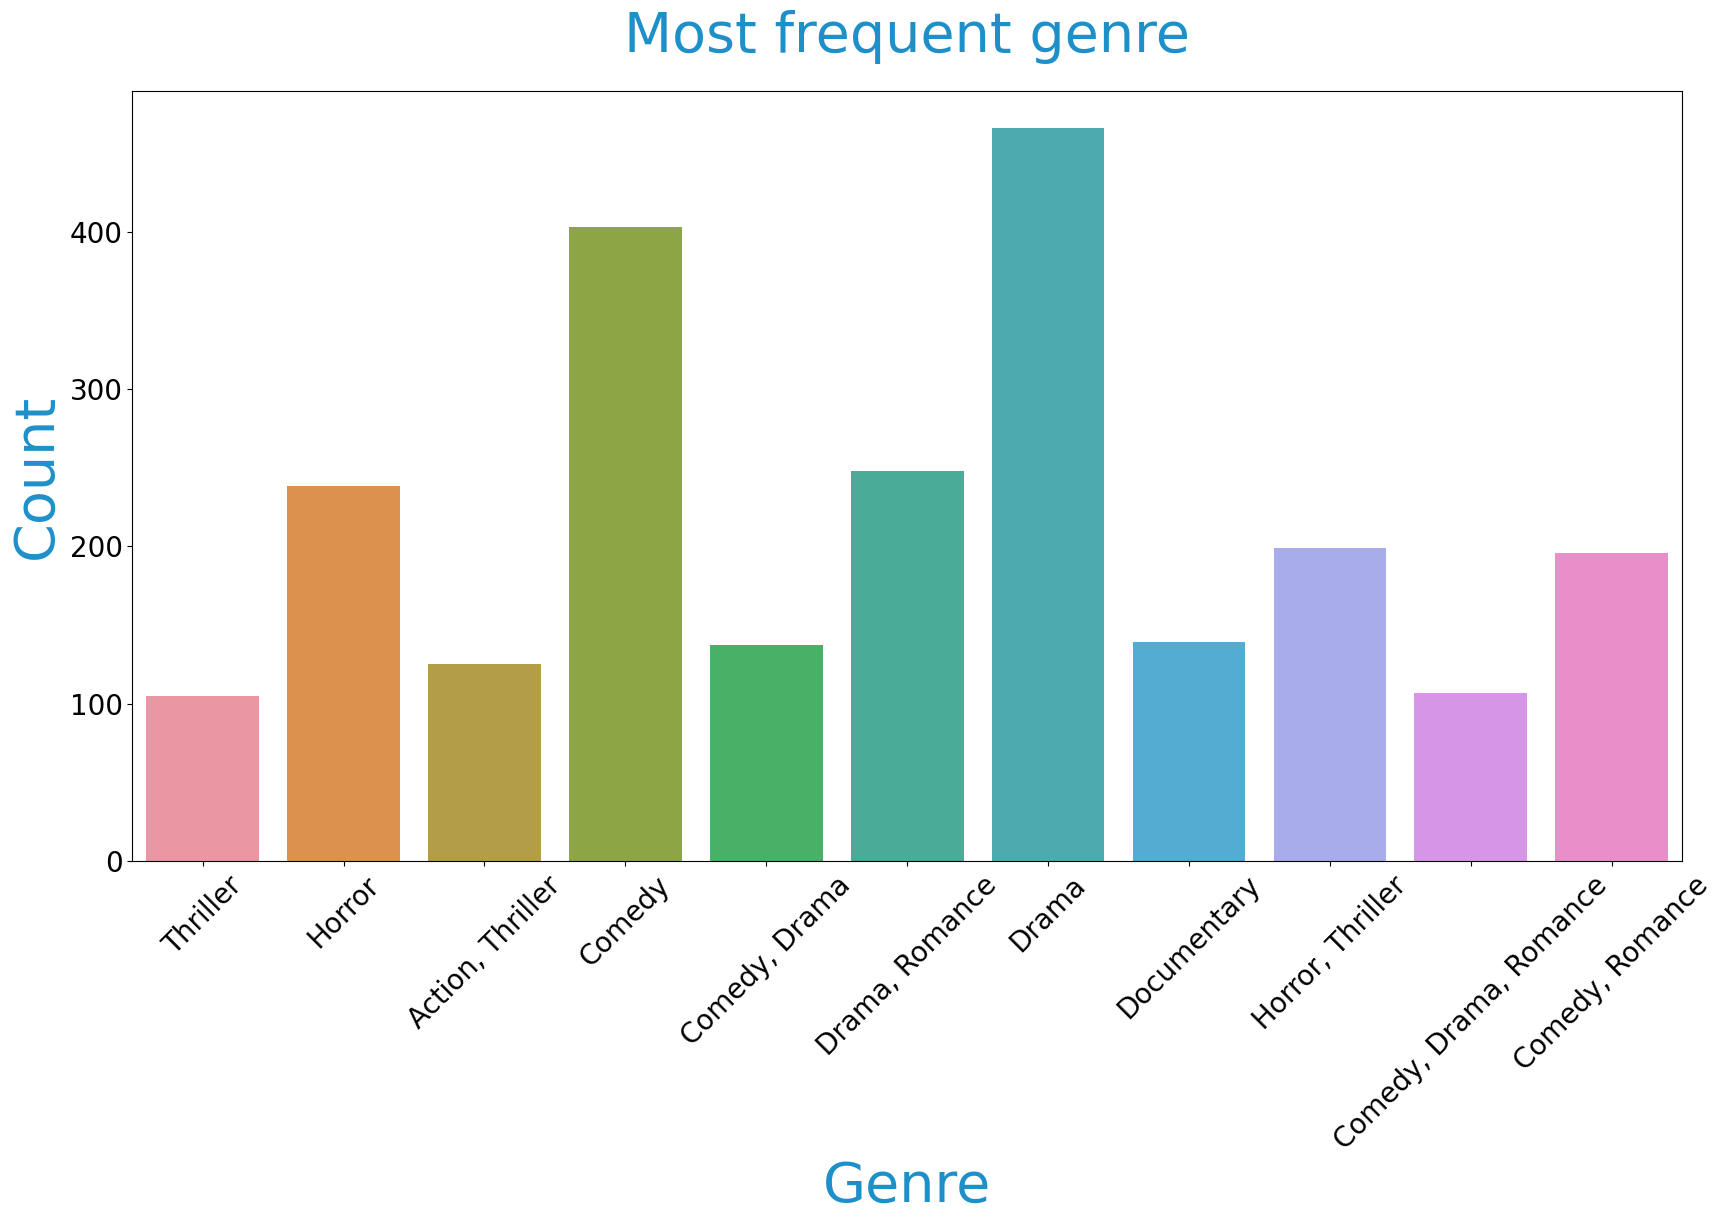

In [211]:
plt.subplots(figsize=(20, 10))
sns.countplot(x= most_famous_movies_genre_series)

plt.title('Most frequent genre' , y = 1.04 , size=40 , color='#1e90c9')
plt.xlabel('Genre', size=40 , color='#1e90c9')
plt.ylabel('Count', size=40 , color='#1e90c9')
plt.xticks(rotation = 45 , size=20)
plt.yticks(size = 20)
plt.show()

# From this visualization we see  `Drama`   is a Most frequent genre                                                

<hr>

# `Second question`

#### genres has highest votes

In [212]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


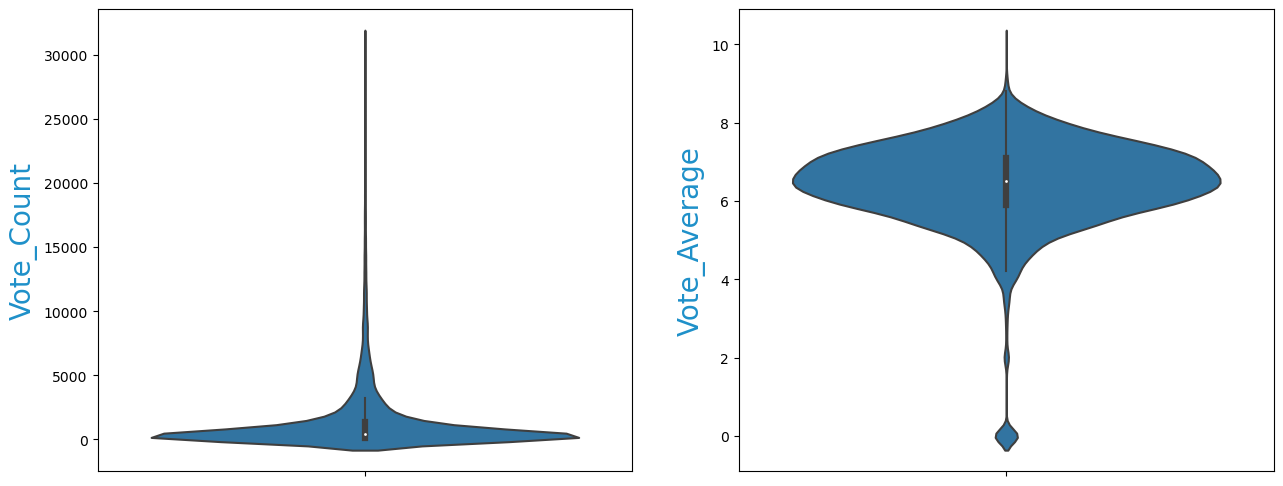

                  Most of Vote count is less than 1500                              Most of Vote average is betewwn 5 and 8



In [213]:
fig = plt.figure(figsize=(40,6))

fig.add_subplot(1,5,1)   # add_subplot( nrows, ncols, index )
sns.violinplot(y = 'Vote_Count' , data = df ) 
plt.ylabel('Vote_Count' , size=20, color='#1e90c9')

fig.add_subplot(1,5,2)
sns.violinplot(y = 'Vote_Average' , data = df)
plt.ylabel('Vote_Average' , size=20, color='#1e90c9')
print()
plt.show()
print(Fore.BLUE + 17*' ' +  " Most of Vote count is less than 1500" + 30*' ' + "Most of Vote average is betewwn 5 and 8\n")

## This `violin plot` will help to know what is the range of data and where it is maximum and howit's distribution looks like

    Note: There is movies with Vote count = 0 and Vote average = 0, which is a very strange thing !!!

## Now I'll explore genres has highest votes by  `Vote_Average` & `Vote_Count`

In [246]:
top_10_vote_average  = df.sort_values(by='Vote_Average',ascending=False).head(10)
top_10_Vote_Count    = df.sort_values(by='Vote_Count',ascending=False).head(10)
top_10_vote_average

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
9391,2020-04-09,Kung Fu Master Huo Yuanjia,The young and vigorous Huo Yuanjia was only fo...,13.745,1,10.0,zh,"Action, Drama",https://image.tmdb.org/t/p/original/boXAHksMko...
7339,2018-06-08,Franco Escamilla: Por La Anécdota,Mexican stand-up comedian Franco Escamilla dra...,16.158,92,9.2,es,Comedy,https://image.tmdb.org/t/p/original/f4iwq1hkcA...
667,2019-03-29,Demon Slayer: Kimetsu no Yaiba Sibling's Bond,Tanjiro finds his family slaughtered and the l...,86.689,27,9.1,ja,"Action, Animation, Fantasy",https://image.tmdb.org/t/p/original/99cJLZkNoI...
2325,2021-06-17,Impossible Things,A widow who is tormented by the memory of her ...,36.466,82,9.1,es,"Family, Drama",https://image.tmdb.org/t/p/original/eaf7GQj0ie...
7401,2020-10-30,My Sex Doll,The story of chaos both body and mind occurs w...,16.088,4,9.0,th,"Comedy, Romance",https://image.tmdb.org/t/p/original/cyVyrXq5dR...
7014,2018-05-16,Sex School: Dorms of Desire,"Boning up for the finals, the girls of CSU won...",16.683,1,9.0,en,Comedy,https://image.tmdb.org/t/p/original/t28RVyiQ66...
6728,2021-11-18,Mission «Sky»,In the center of the story are three main char...,17.133,34,9.0,ru,"Drama, War",https://image.tmdb.org/t/p/original/fRWz8DU3iM...
2391,2020-10-14,The Three Deaths of Marisela Escobedo,Follows a mother's tireless crusade to jail he...,35.767,183,9.0,es,"Documentary, Crime",https://image.tmdb.org/t/p/original/4E7nNHIchH...
7039,2019-08-07,Bring the Soul: The Movie,"Following their landmark “Love Yourself” tour,...",16.652,323,8.9,ko,"Music, Documentary",https://image.tmdb.org/t/p/original/7x5CguA0Mx...
5069,2021-08-19,"Ni tuyo, Ni mía",Amanda realizes that her perfect husband is ha...,20.696,49,8.9,es,Drama,https://image.tmdb.org/t/p/original/6fFrpmf0mQ...


# visualization by ( scatterplot )

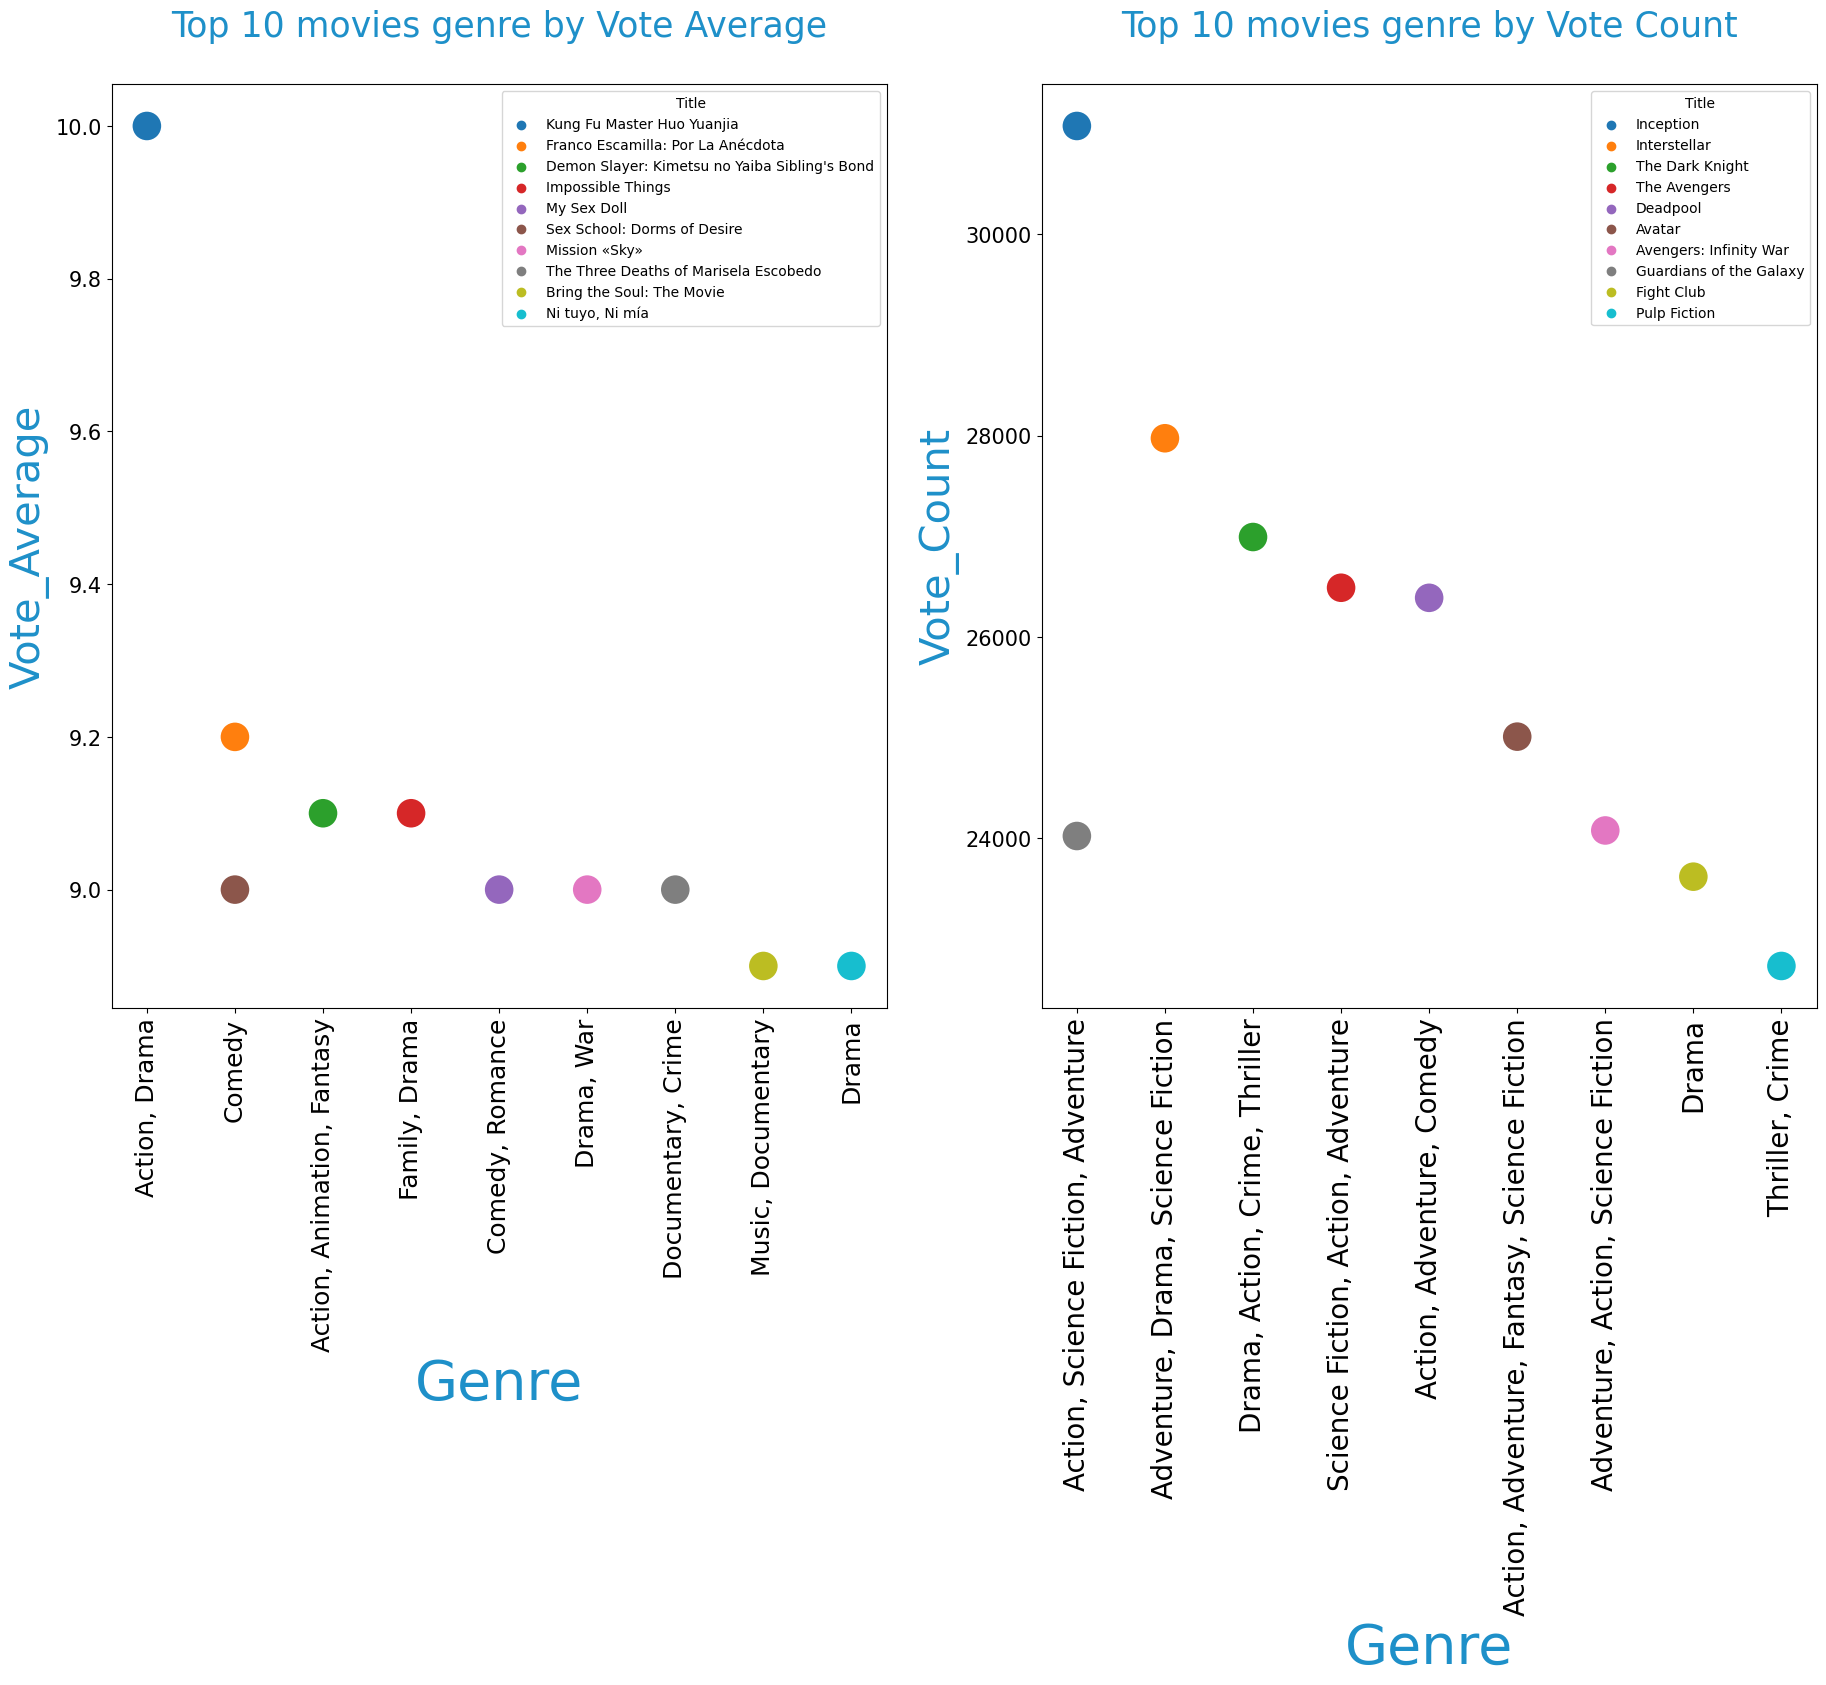

In [243]:
                           ############           for Vote_Average        #############
  

fig = plt.figure(figsize=(22,12))
fig.add_subplot(1,2,1)
sns.scatterplot(x='Genre', y='Vote_Average' , data=top_10_vote_average , s = 500 , hue = 'Title' )
plt.xlabel('Genre' , size=40 , color='#1e90c9' )
plt.ylabel('Vote_Average' , size=30 , color='#1e90c9' )
plt.title('Top 10 movies genre by Vote Average\n' , size=25 , color='#1e90c9')
plt.xticks(rotation = 90 , size = 18)
plt.yticks(size = 15)

                          #############         for Vote_Count           ###############
    
fig.add_subplot(1,2,2)   
sns.scatterplot(x='Genre', y='Vote_Count' , data=top_10_Vote_Count , s = 500 , hue = 'Title')
plt.xlabel('Genre' , size=40 , color='#1e90c9' )
plt.ylabel('Vote_Count' , size=30 , color='#1e90c9' )
plt.title('Top 10 movies genre by Vote Count\n' , size=25 , color='#1e90c9')
plt.xticks(rotation = 90 , size = 20)
plt.yticks(size = 15)    
    
plt.show()

# From the previous graph I can now know which are the 10 most voting average movies and the 10 highest voting count movies and their genre 

# The most voting average 3 movies are :
>
>   1- Kung Fu Master Huo Yuanjia : ( Action, Drama )
>
>    2- Franco Escamilla: Por La Anécdota : ( Comedy )
>
>    3- Demon Slayer: Kimetsu no Yaiba Sibling's Bond : ( Action, Animation, Fantasy )

# The highest voting count 3 movies are :
>
>    1 - Inception : (Action, Science Fiction, Adventure)
>   
>    2 - Interstellar : (Adventure, Drama, Science Fiction)
>    
>    3- The Dark Knight : (Drama, Action, Crime, Thriller )

<hr>

# `third question`

#### What movie go t the highest popularity 

In [97]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


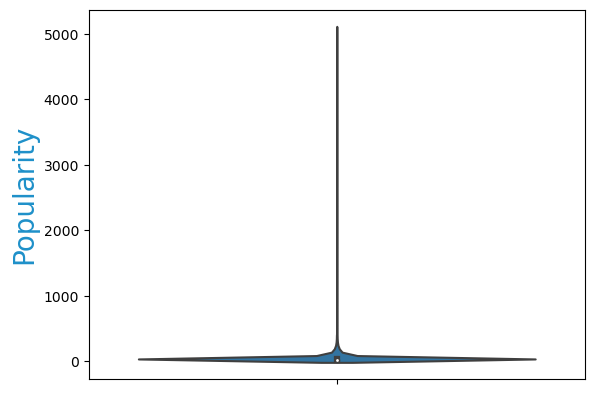

In [357]:
sns.violinplot(y = 'Popularity' , data = df ) 
plt.ylabel('Popularity' , size=20 , color='#1e90c9')
plt.show()

In [119]:
len(df.loc[df['Popularity'] < 50])

8312

# >>>>>>>>  Most of popularity is less than 50  <<<<<<<<<

## Now I will explore the 10 movies that have the highest popularity  Like we did with   Vote_Count  & Vote_Average

In [248]:
top_10_popular  = df.sort_values(by='Popularity',ascending=False).head(10)
top_10_popular

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...
5,2022-01-07,The Commando,An elite DEA agent returns home after a failed...,1750.484,33,6.6,en,"Action, Crime, Thriller",https://image.tmdb.org/t/p/original/pSh8MyYu5C...
6,2022-01-12,Scream,Twenty-five years after a streak of brutal mur...,1675.161,821,6.8,en,"Horror, Mystery, Thriller",https://image.tmdb.org/t/p/original/kZNHR1upJK...
7,2022-02-10,Kimi,A tech worker with agoraphobia discovers recor...,1601.782,206,6.3,en,Thriller,https://image.tmdb.org/t/p/original/okNgwtxIWz...
8,2022-02-17,Fistful of Vengeance,A revenge mission becomes a fight to save the ...,1594.013,114,5.3,en,"Action, Crime, Fantasy",https://image.tmdb.org/t/p/original/3cccEF9QZg...
9,2021-11-03,Eternals,The Eternals are a team of ancient aliens who ...,1537.406,4726,7.2,en,Science Fiction,https://image.tmdb.org/t/p/original/zByhtBvX99...


#  visualization by ( barplot )

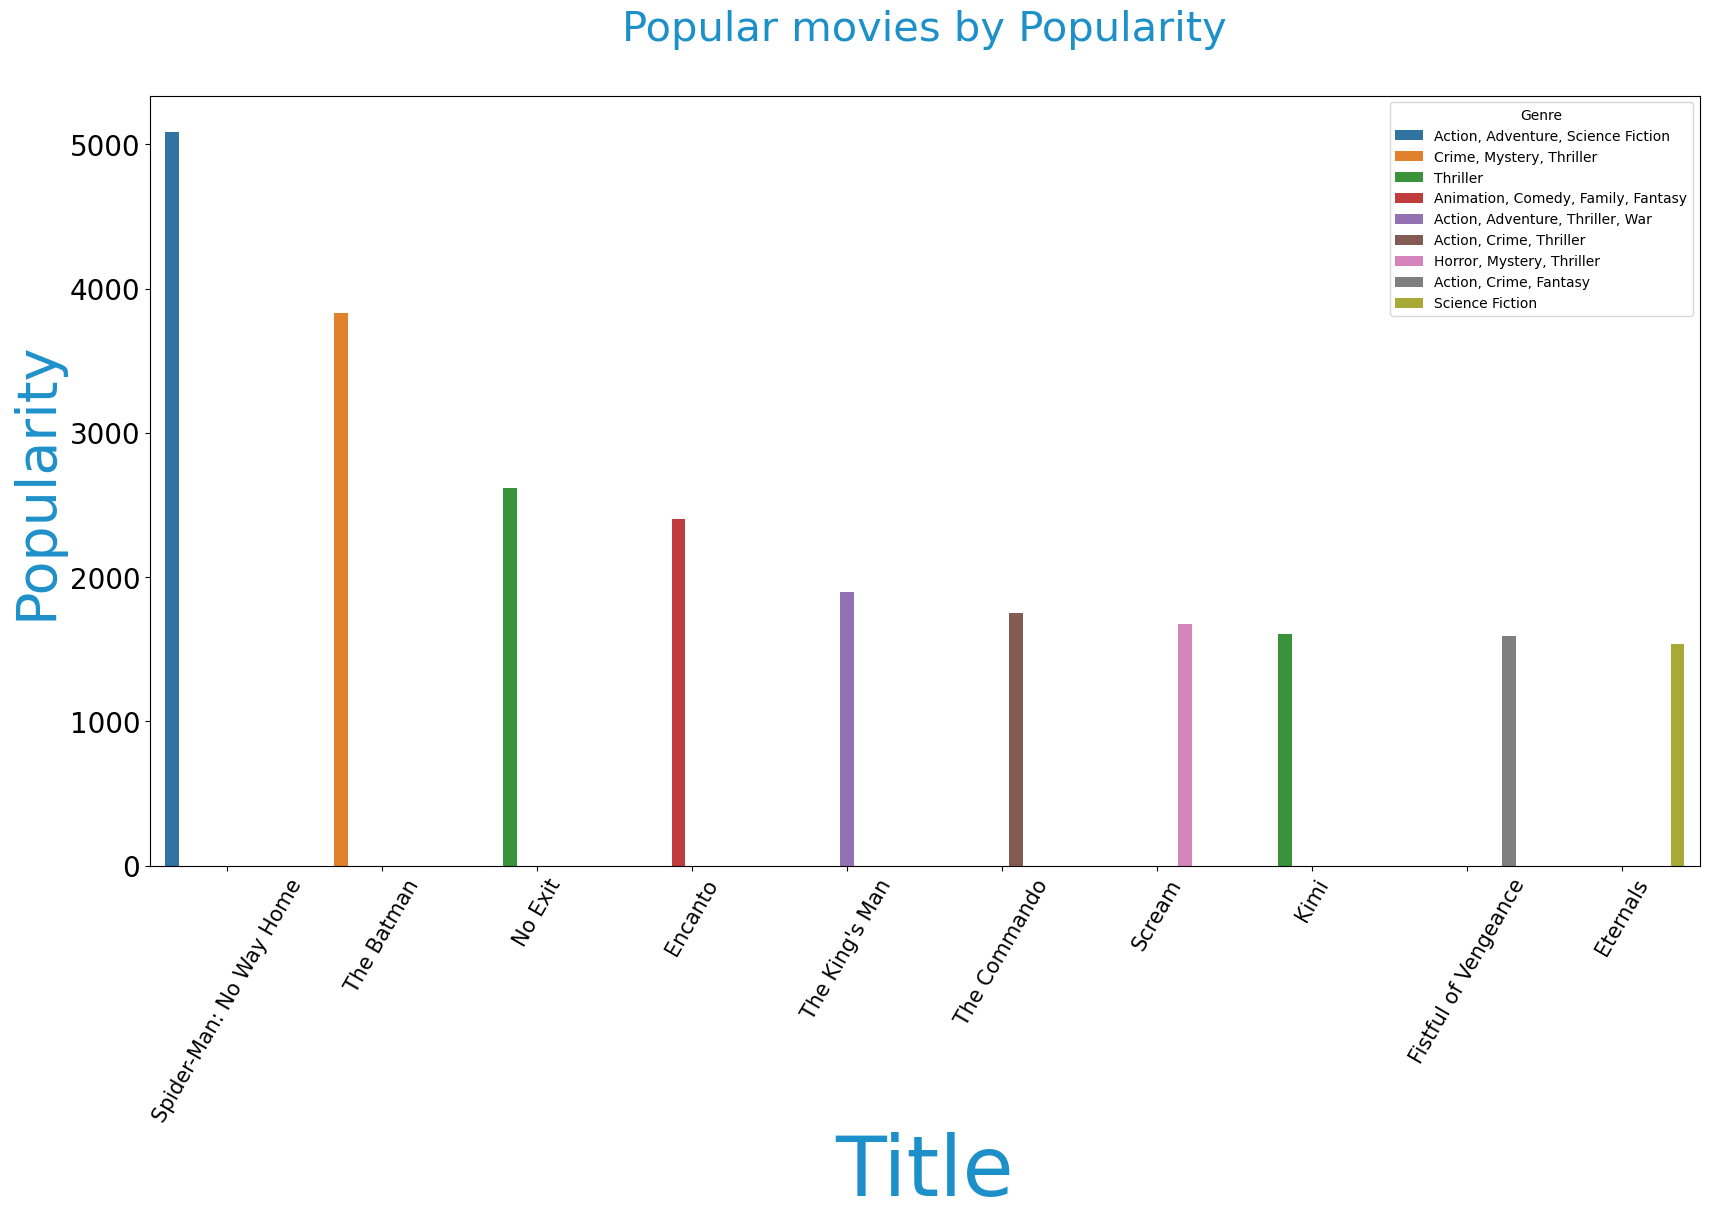

In [359]:
plt.subplots(figsize=(20, 10))
sns.barplot(x='Title', y='Popularity' , data=top_10_popular  ,hue = 'Genre')
plt.xlabel('Title' , size=60 , color='#1e90c9' )
plt.ylabel('Popularity' , size=40 , color='#1e90c9' )
plt.title('Popular movies by Popularity\n' , size=30 , color='#1e90c9')
plt.xticks(rotation = 60 , size = 15)
plt.yticks(size = 20)
plt.show()

#  The most popular movie are :  

    Spider-Man: No Way Home : (Action, Adventure, Science Fiction)

<hr>

# `Fourth question`

####   The year that has the most number of movies 

In [284]:
df['Release_Date'].head()

0    2021-12-15
1    2022-03-01
2    2022-02-25
3    2021-11-24
4    2021-12-22
Name: Release_Date, dtype: object

<div class= "alert alert-block alert-info">
    <b> notice : Release_Date column should be date and I will make it focus only on year. Because I don't care about neither                    month nor day then I will change that date to int </b>
</div>

## Changing Release_Date column type into date and make only on year :

In [311]:
print(Fore.BLUE + 'Release_Date column type was : ',df['Release_Date'].dtypes)
df['Release_Date'] = pd.to_datetime(df['Release_Date'] )

print('\n')
print(Fore.LIGHTBLUE_EX + 'Release_Date column type now is : ',df['Release_Date'].dtypes)

Release_Date column type was :  object


Release_Date column type now is :  datetime64[ns]


In [312]:
df['Release_Date'] = df['Release_Date'].dt.year
print(Fore.LIGHTBLUE_EX + 'Release_Date column type now is : ',df['Release_Date'].dtypes)

df['Release_Date'].head()

Release_Date column type now is :  int64


0    2021
1    2022
2    2022
3    2021
4    2021
Name: Release_Date, dtype: int64

In [330]:
year_dictionary = {}

for year in df['Release_Date']:
    if year not in year_dictionary:
        year_dictionary[year] = 1
    else:
        year_dictionary[year] = year_dictionary[year] + 1
        
year_dictionary = dict(sorted(year_dictionary.items()))


In [333]:
movie_year_df = pd.DataFrame(list(year_dictionary.items()),columns = ['Year','Number of movies'])
movie_year_df.set_index('Year',inplace=True)

movie_year_df.tail(10)

,Number of movies
Year,
2015,390
2016,470
2017,510
2018,530
2019,500
2020,453
2021,714
2022,208
2023,8


# Top 10 years with most movies :

In [334]:
top_10_years_movies_number = movie_year_df.sort_values(by='Number of movies',ascending=False).head(10)
top_10_years_movies_number

,Number of movies
Year,
2021,714
2018,530
2017,510
2019,500
2016,470
2020,453
2015,390
2014,371
2013,348


#     >>>>>>>>The year that has the most number of movies :   `2021`  <<<<<<<<

## visualization by ( plot )

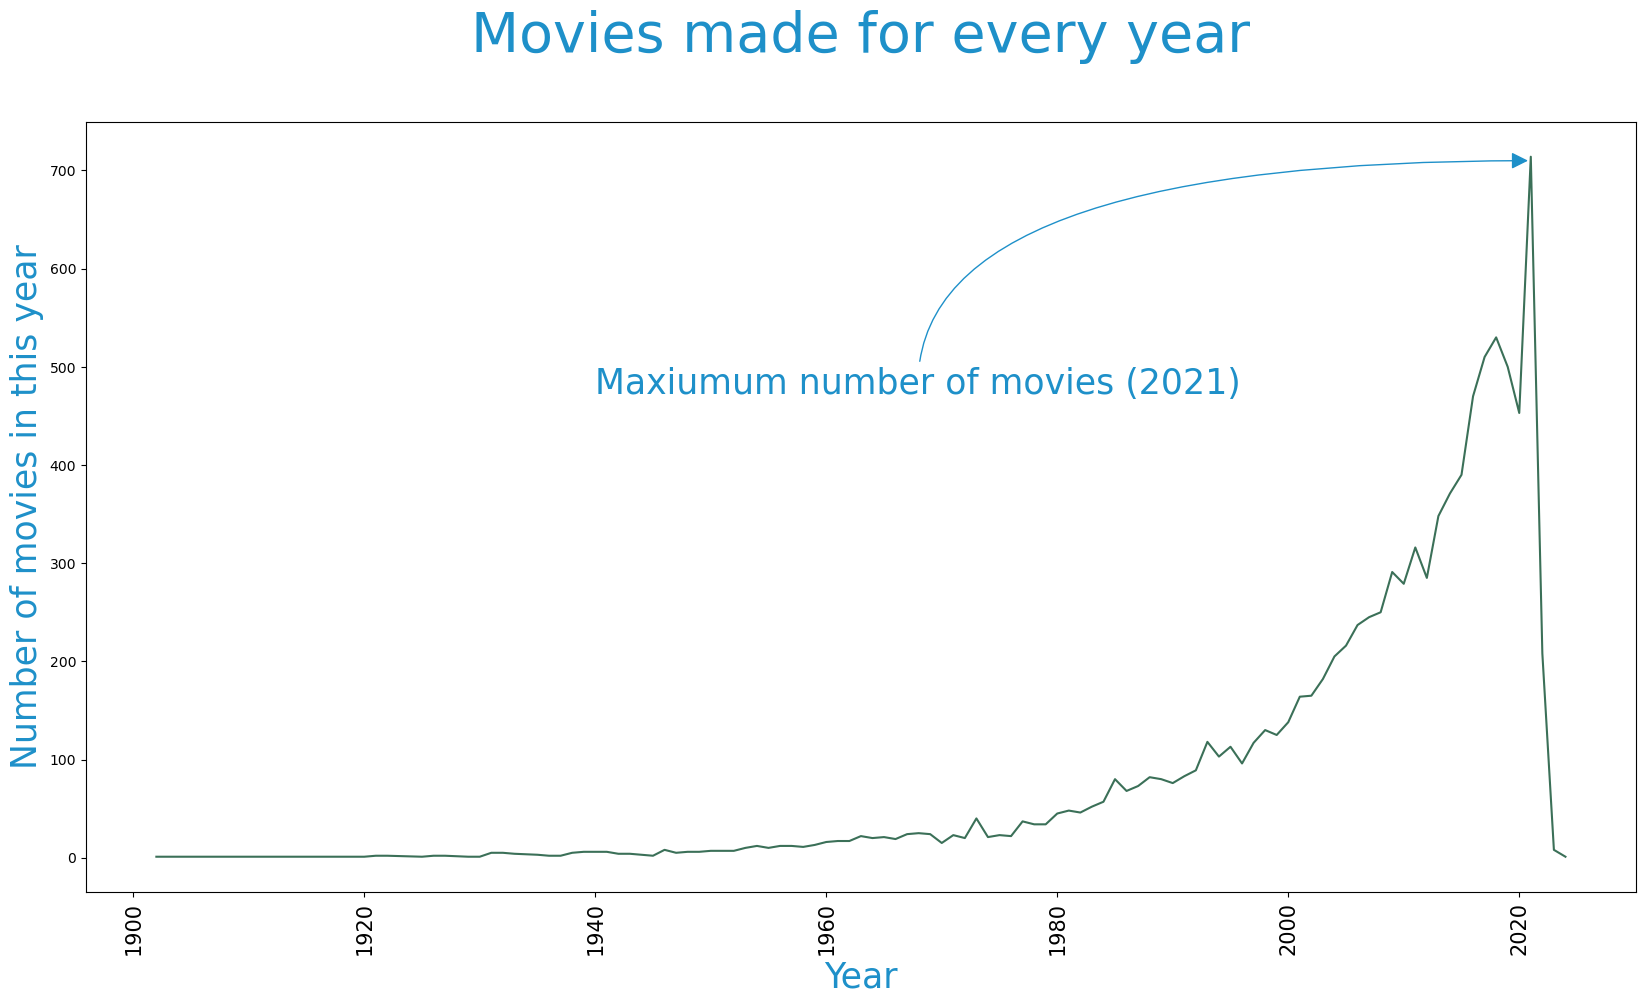

In [362]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(movie_year_df.index,movie_year_df['Number of movies'],color='#3b7058')

plt.ylabel('Number of movies in this year',size=25,color='#1e90c9')
plt.xlabel('Year',size=25,color='#1e90c9')
plt.title('Movies made for every year',size=40,color='#1e90c9' ,y = 1.08)

plt.xticks(rotation=90,size=15)

ax.annotate("Maxiumum number of movies (2021)",               
             xy = (2021,710),  
             size=25,
             color='#1e90c9',
             xytext = (1940,500),
             horizontalalignment='left',
             va = "top",
             arrowprops = {'arrowstyle':'-|>','color':'#1e90c9','connectionstyle':'angle3'}   
)

plt.show()

# Summary :
 
>- Most frequent Genre is `Drama`  then `Comedy`  then `Action` 
>
>
>- The Genre and Film with the highest votes by Vote_Average is : `Action, Drama`    **,**    `Kung Fu Master Huo Yuanjia`
>
> 
>- The Genre and Film with the highest votes by Vote_Count is : `Action, Science Fiction, Adventure`  **,** `Inception` 
>
>
>- Highest popularity movie is `Spider-Man: No Way Home` then `The Batman` then `No Exit`
>
>
>- Year that has the most number of movies is `2021`

# The End

<hr>